In [1]:
import peres_functions as pf
import pickle
import numpy as np, matplotlib.pyplot as plt
from collections import Counter

Engine requested: 
Running Bell-state measurements
Done with iteration 4

Running Computational measurements
Creating folder product_peres__2021-07-09_12_25_bits_10000_shots_trial_6
Results saved in file product_peres__2021-07-09_12_25_bits_10000_shots_trial_6/result_list_trial_6

Completed.
[0.00142182 0.58751453]


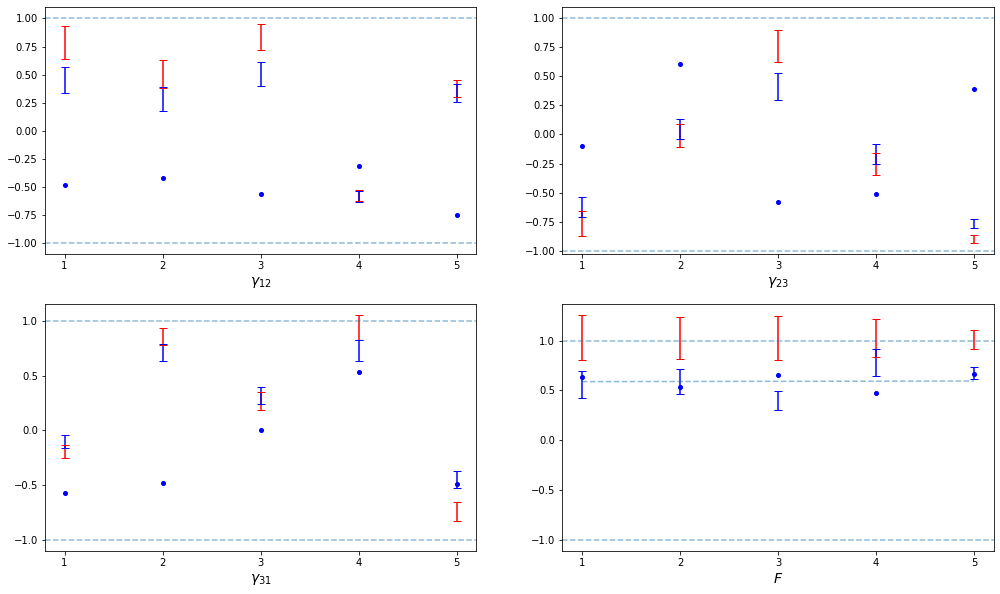

In [2]:
q1, q2 = 12, 25
trial = 6
engine = ''
iters = 5

try:
    result_list = pf.run_peres(q1, q2, trial, engine, iters)
#     plot = pf.compute_gammas(result_list, 10000)
#     plot.savefig('test_fig_2.pdf')
#     print('Plot saved as "test_fig_2.pdf".')

except Exception as e:
    print(e)
with open('all_cfs_boot_25.pkl', 'rb') as file:
    cfs_th = np.array(pickle.load(file))

with open('all_cfs_aspen_cy_25.pkl', 'rb') as file:
    cfs_as = np.array(pickle.load(file))  
plot = pf.compute_gammas(result_list[:5], 10000, cfs_th[:5], cfs_as[:5])

In [1]:
import peres_functions as pf
import pickle
import numpy as np, matplotlib.pyplot as plt
from collections import Counter

with open('product_peres_Aspen_2021-06-28_12_25_bits_10000_shots_trial_1/result_list_trial_1', 'rb') as file:
    res = pickle.load(file)
with open('product_peres_Aspen_2021-06-28_12_25_bits_10000_shots_trial_2/result_list_trial_2', 'rb') as file:
    res = res + pickle.load(file)
with open('product_peres_Aspen_2021-06-28_12_25_bits_10000_shots_trial_3/result_list_trial_3', 'rb') as file:
    res = res + pickle.load(file)
with open('product_peres_Aspen_2021-06-28_12_25_bits_10000_shots_trial_4/result_list_trial_4', 'rb') as file:
    res = res + pickle.load(file)
with open('product_peres_Aspen_2021-06-28_12_25_bits_10000_shots_trial_5/result_list_trial_5', 'rb') as file:
    res = res + pickle.load(file)

with open('all_cfs_25_procs.pkl', 'rb') as file:
    cfs_th = np.array(pickle.load(file))

with open('all_cfs_aspen_cy_25_10000.pkl', 'rb') as file:
    cfs_as = np.array(pickle.load(file))

specified_params = [res[i]['State_params'] for i in range(len(res))]

q1, q2 = 12, 25
trial = 1
engine = '2q-qvm'
iters = 25

try:
    result_list = pf.run_peres(q1, q2, trial, engine, iters, specified_params)
#     plot = pf.compute_gammas(result_list, 10000)
#     plot.savefig('test_fig_2.pdf')
#     print('Plot saved as "test_fig_2.pdf".')

except Exception as e:
    print(e)
# result_list = res
del_indices = [0, 6, 9, 13, 19, 23]
del_indices = [del_indices[i] - i for i in range(len(del_indices))]
for del_index in del_indices:
    del result_list[del_index]
    cfs_th = np.delete(cfs_th, del_index, axis=0)
    cfs_as = np.delete(cfs_as, del_index, axis=0)

Engine requested: 2q-qvm
Running Bell-state measurements
Done with iteration 24

Running Computational measurements
Creating folder product_peres_2q-qvm_2021-07-10_12_25_bits_10000_shots_trial_1
Results saved in file product_peres_2q-qvm_2021-07-10_12_25_bits_10000_shots_trial_1/result_list_trial_1

Completed.


[-0.00954133  0.6660972 ]


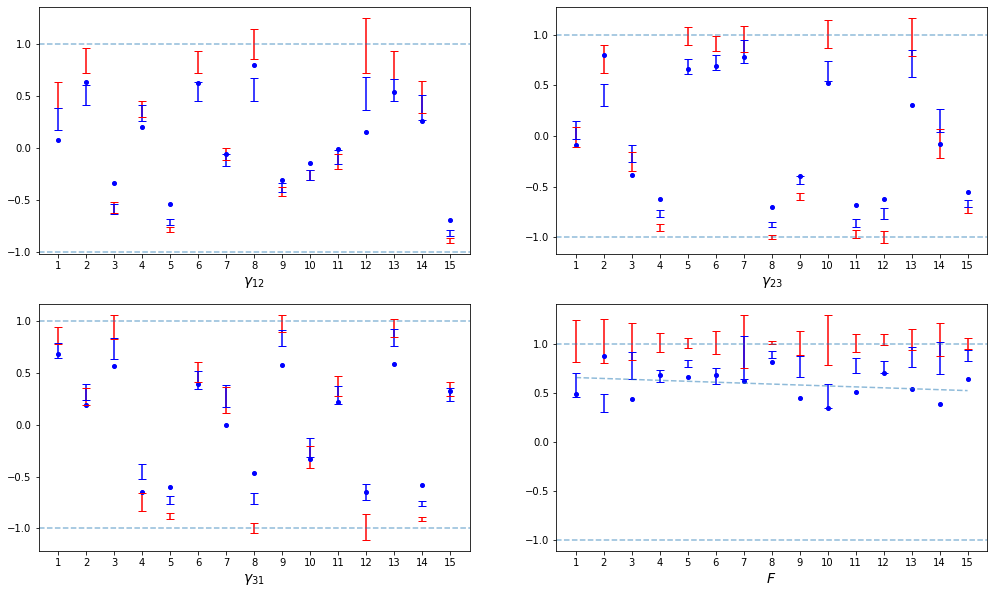

In [2]:
plot = pf.compute_gammas(result_list[:15], 10000, cfs_th[:15], cfs_as[:15])

In [43]:
del_indices = [6, 9, 13, 19, 23]
del_indices = [del_indices[i] - i for i in range(len(del_indices))]
for del_index in del_indices:
    del result_list[del_index]
    cfs_th = np.delete(cfs_th, del_index, axis=0)
    cfs_as = np.delete(cfs_as, del_index, axis=0)

In [33]:
# del result_list[13]
cfs_as = np.delete(cfs_as, 13, axis=0)

In [7]:
# with open('all_res.pkl', 'wb') as file:
#     pickle.dump(res, file)

[0.00214109 0.57291257]


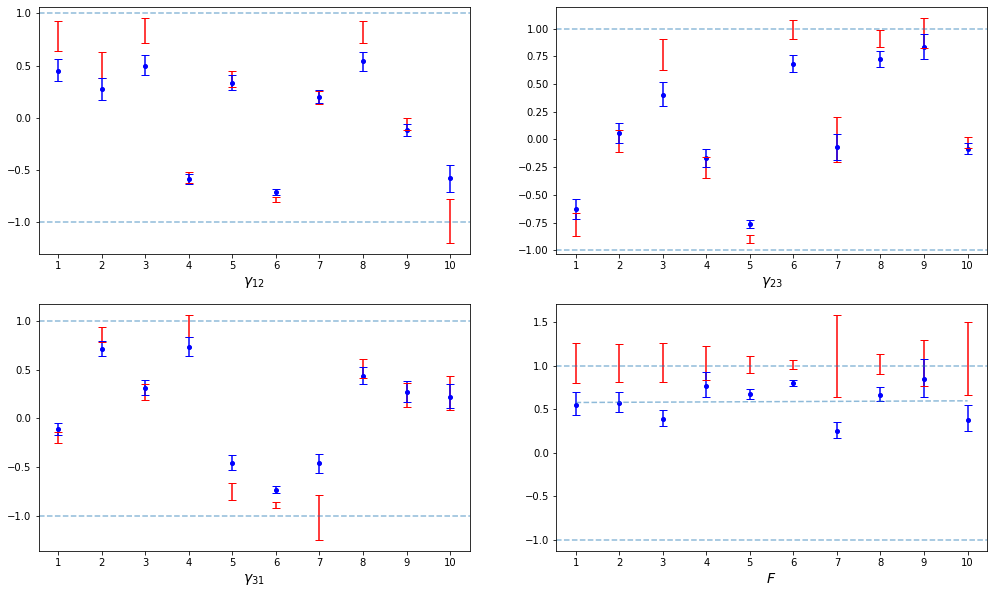

In [8]:
plot = pf.compute_gammas(res[:10], 10000, cfs_th[:10], cfs_as[:10])

In [12]:
specified_params = [res[i]['State_params'] for i in range(len(res))]

In [7]:
from scipy.optimize import curve_fit as cf

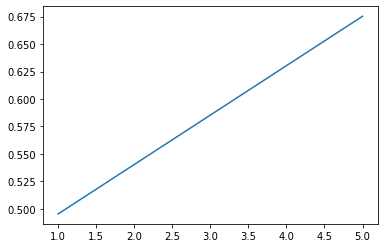

In [8]:
fit = lambda x, a, b: a*x + b
xdata = np.arange(1,6)
ydata = [res[i]['Gamma']['F'] for i in range(5)]
popt, pcov = cf(fit, xdata, ydata)
plt.plot(xdata, fit(xdata, *popt))

In [10]:
popt

array([0.04496277, 0.45048429])

In [9]:
res[0]['Gamma']['F']

0.5434895575415296

In [6]:
plot.savefig('peres_all_plots.pdf', bbox_inches='tight')

In [4]:
with open('all_cfs.pkl', 'rb') as file:
    cfs = np.array(pickle.load(file))

In [ ]:
cf12 = cfs[:,0]
cf23 = cfs[:,1]
cf31 = cfs[:,2]
cfF = cfs[:,3]

m12 = list(map(np.mean, cf12))
m23 = list(map(np.mean, cf23))
m31 = list(map(np.mean, cf31))
mF = list(map(np.mean, cfF))

x = np.arange(len(cf12))
fig, ax = plot.add_subplot(2,2,1)
# ax = plot.add_subplot(2,2,1)
ax.errorbar(x, m12, yerr=[m12 - cf12[:,0], cf12[:,1] - m12], fmt='.', marker='', capsize=4)


# plt.subplot(2,2,2)
# plt.errorbar(x, m23, yerr=[m23 - cf23[:,0], cf23[:,1] - m23], fmt='.', marker='', capsize=4)

# plt.subplot(2,2,3)
# plt.errorbar(x, m31, yerr=[m31 - cf31[:,0], cf31[:,1] - m31], fmt='.', marker='', capsize=4)

# plt.subplot(2,2,4)
# plt.errorbar(x, mF, yerr=[mF - cfF[:,0], cfF[:,1] - mF], fmt='.', marker='', capsize=4)

In [ ]:
plot.show()

In [ ]:
[res[i]['State_params'] for i in range(len(res))]

In [ ]:
params_str = str([res[i]['State_params'] for i in range(len(res))])

In [ ]:
params_str = params_str.replace('[', '{')
params_str = params_str.replace(']', '}')
params_str = params_str.replace('(', '{')
params_str = params_str.replace(')', '}')
params_str

In [ ]:
from scipy.optimize import curve_fit as cf

In [ ]:
sum([res[i]['Gamma']['F'] for i in range(len(res))]) / len(res)

In [ ]:
for data in res:
    data = pf.gamma_theory(data)

In [ ]:
res[0]

# Statistical fluctuation through repetition

In [ ]:
import numpy as np, matplotlib.pyplot as plt, random, time, datetime
from functools import lru_cache
from pyquil import Program, get_qc
from pyquil.gates import *
import os
from pyquil.quilatom import quil_sin, quil_cos, Parameter
from pyquil.quilbase import DefGate
from pyquil.latex import display, to_latex
# import Peres_helpers as hf
import pickle
from collections import Counter
result_list = res[:]

q1, q2 = 12, 25
trial=1
# engine = 'qvm'
# folder = f'new_peres_{engine}_{datetime.date.today()}_{q1}_{q2}_bits_{N_SHOTS}_shots_trial_{trial}'
# os.system(f'mkdir {folder}')

qc = get_qc('Aspen-9', as_qvm=True) # Initialise QPU.

circ = circuit(q1,q2)
exe = qc.compile(circ)

for result in result_list:
    print(f"States {result['State_params']}", end='\n')
    result['CF99'] = {}
    result['CF100'] = {}
    result['Stats'] = {}
    data = {}
    data['State_params'] = result['State_params']
    data['a'] = []
    data['b'] = []
    data['c'] = []
    data['F'] = []
    for i in range(50):
    #     data = {}
    #     data['State_params'] = params_complex()

        Counts = f(data['State_params'])

    #     with open(f'{folder}/run_{i}', 'wb') as file:
    #         pickle.dump(data, file)

        all_gammas = get_gammas(Counts, sub_N)
        data['a'].append(all_gammas['a'])
        data['b'].append(all_gammas['b'])
        data['c'].append(all_gammas['c'])
        data['F'].append(all_gammas['F'])
        print(f'Done with iteration {i}', end='\r')

    #     result_list.append(data)

#     print(f'Done with iteration {i}', end='\r')

    samp = data['a']
    samp.sort()
    result['Stats']['a'] = samp
    result['CF99']['a'] = [samp[int(0.005 * len(samp))], samp[int(0.995 * len(samp))]]
    result['CF100']['a'] = [samp[0], samp[-1]]

    samp = data['b']
    samp.sort()
    result['Stats']['b'] = samp
    result['CF99']['b'] = [samp[int(0.005 * len(samp))], samp[int(0.995 * len(samp))]]
    result['CF100']['b'] = [samp[0], samp[-1]]

    samp = data['c']
    samp.sort()
    result['Stats']['c'] = samp
    result['CF99']['c'] = [samp[int(0.005 * len(samp))], samp[int(0.995 * len(samp))]]
    result['CF100']['c'] = [samp[0], samp[-1]]

    samp = data['F']
    samp.sort()
    result['Stats']['F'] = samp
    result['CF99']['F'] = [samp[int(0.005 * len(samp))], samp[int(0.995 * len(samp))]]
    result['CF100']['F'] = [samp[0], samp[-1]]
    
    
# with open(f'{folder}/result_list', 'wb') as file:
#     pickle.dump(result_list, file)

In [ ]:
all_a = []
all_b = []
all_c = []
all_F = []

all_cf_a = []
all_cf_b = []
all_cf_c = []
all_cf_F = []

all_mid_a = []
all_mid_b = []
all_mid_c = []
all_mid_F = []


for result in res_list:
    all_a.append(result['Gamma']['a'])
    all_b.append(result['Gamma']['b'])
    all_c.append(result['Gamma']['c'])
    all_F.append(result['Gamma']['F'])
    
    all_mid_a.append((result['CF100']['a'][1] + result['CF100']['a'][0])/2)
    all_mid_b.append((result['CF100']['b'][1] + result['CF100']['b'][0])/2)
    all_mid_c.append((result['CF100']['c'][1] + result['CF100']['c'][0])/2)
    all_mid_F.append((result['CF100']['F'][1] + result['CF100']['F'][0])/2)
    
    all_cf_a.append((result['CF100']['a'][1] - result['CF100']['a'][0])/2)
    all_cf_b.append((result['CF100']['b'][1] - result['CF100']['b'][0])/2)
    all_cf_c.append((result['CF100']['c'][1] - result['CF100']['c'][0])/2)
    all_cf_F.append((result['CF100']['F'][1] - result['CF100']['F'][0])/2)
    
    
    

In [ ]:
x = np.arange(len(all_a))
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.axhline(y=-1)
plt.axhline(y=1)
plt.plot(x, all_a, '.', color='darkblue')
plt.errorbar(x, all_mid_a, yerr=[all_cf_a, all_cf_a], marker='', fmt='', capsize=5, ls='', color='darkblue')
plt.xlabel('Different states', size=14)
plt.ylabel('$\gamma_{12}$', size=18)

plt.subplot(2,2,2)
plt.axhline(y=-1)
plt.axhline(y=1)
plt.plot(x, all_b, '.', color='darkred')
plt.errorbar(x, all_mid_b, yerr=[all_cf_b, all_cf_b], marker='', fmt='', capsize=5, ls='', color='darkred')
plt.xlabel('Different states', size=14)
plt.ylabel('$\gamma_{23}$', size=18)

plt.subplot(2,2,3)
plt.axhline(y=-1)
plt.axhline(y=1)
plt.plot(x, all_c, '.', color='darkorange')
plt.errorbar(x, all_mid_c, yerr=[all_cf_c, all_cf_c], marker='', fmt='', capsize=5, ls='', color='darkorange')
plt.xlabel('Different states', size=14)
plt.ylabel('$\gamma_{31}$', size=18)

plt.subplot(2,2,4)
plt.axhline(y=-1)
plt.axhline(y=1)
plt.plot(x, all_F, '.', color='darkgreen')
plt.errorbar(x, all_mid_F, yerr=[all_cf_F, all_cf_F], marker='', fmt='', capsize=5, ls='', color='darkgreen')
plt.xlabel('Different states', size=14)
plt.ylabel('$F$', size=18)

# plt.savefig(f'product_peres_on_{datetime.date.today()}.pdf', bbox_inches='tight')

In [ ]:
with open(f'product_peres_with_error_from_qvm_{datetime.date.today()}', 'wb') as file:
    pickle.dump(result_list, file)

# Pure statistical error

In [ ]:
x = list(range(10))

In [ ]:
x[:21]

In [ ]:
# Good state params
good_sp = [res_list[i]['State_params'] for i in [0,1,2,6,7]]
good_sp

In [ ]:
with open(f'good_states_{datetime.date.today()}_{15}_states.pkl', 'wb') as file:
    pickle.dump(gs + good_sp, file)

In [ ]:
with open(f'good_states_{datetime.date.today()}_{15}_states.pkl', 'rb') as file:
    gs = pickle.load(file)
len(gs)

In [ ]:
result_list = []
q1, q2 = 12, 25
trial=2
engine = 'Aspen'
folder = f'product_peres_{engine}_{datetime.date.today()}_{q1}_{q2}_bits_{N_SHOTS}_shots_trial_{trial}'
# folder = f'product_peres_{engine}_{datetime.date.today()}_{q1}_{q2}_bits_{N_SHOTS}_shots'
os.system(f'mkdir {folder}')

qc = get_qc('Aspen-9')#, as_qvm=True) # Initialise QPU.
# qc = get_qc('2q-qvm')

circ = circuit(q1,q2)
exe = qc.compile(circ)

for i in range(4):
    data = {}
    data['State_params'] = params_complex()

    data['Counts'] = f(data['State_params'])
    
    result_list.append(data)

    print(f'Done with iteration {i}', end='\r')

with open(f'{folder}/result_list_trial_{trial}', 'wb') as file:
    pickle.dump(result_list, file)

In [ ]:
len(gs)

In [ ]:
len(gs + good_sp)

In [ ]:
with open('product_peres_Aspen_2021-06-23_12_25_bits_10000_shots_trial_1/result_list_trial_1', 'rb') as file:
    result_list = pickle.load(file)

In [ ]:
len(asp_res)

In [ ]:
sub_N =10000
def plot_all(result_list, sub_N):
    fig = plt.figure(figsize=(17, 10))
    for sub_N in [sub_N]:
        all_a = []
        all_b = []
        all_c = []
        all_F = []

        all_a_theory = []
        all_b_theory = []
        all_c_theory = []
        all_F_theory = []

        all_a_errors = []
        all_b_errors = []
        all_c_errors = []
        all_F_errors = []

        for data in result_list:
            data['Gamma'] = get_gammas(data['Counts'], sub_N)
            all_a.append(data['Gamma']['a'])
            all_b.append(data['Gamma']['b'])
            all_c.append(data['Gamma']['c'])
            all_F.append(data['Gamma']['F'])

        x = np.array(list(range(1,len(result_list)+1)))
    #     fig = plt.figure(figsize=(17,10))
        plt.subplot(2,2,1)
        plt.plot(x, all_a, 'o', color='red', markersize=4)
        plt.axhline(y=1, ls='dashed', alpha=0.5)
        plt.axhline(y=-1, ls='dashed', alpha=0.5)
        plt.xticks(x)
        plt.xlabel('$\\gamma_{12}$', size=14)

        plt.subplot(2,2,2)
        plt.plot(x, all_b, 'o', color='blue', markersize=4)
        plt.axhline(y=1, ls='dashed', alpha=0.5)
        plt.axhline(y=-1, ls='dashed', alpha=0.5)
        plt.xticks(x)
        plt.xlabel('$\\gamma_{23}$', size=14)

        plt.subplot(2,2,3)
        plt.plot(x, all_c, 'o', color='darkgreen', markersize=4)
        plt.axhline(y=1, ls='dashed', alpha=0.5)
        plt.axhline(y=-1, ls='dashed', alpha=0.5)
        plt.xticks(x)
        plt.xlabel('$\\gamma_{31}$', size=14)

        plt.subplot(2,2,4)
        plt.plot(x, all_F, 'o', color='maroon', markersize=4)
        plt.axhline(y=1, ls='dashed', alpha=0.5)
        plt.axhline(y=-1, ls='dashed', alpha=0.5)
        plt.xticks(x)
        plt.xlabel('$F$', size=14)
        
        plt.show()

In [ ]:
plot_all(result_list, 1600)

In [ ]:
fig = plt.figure(figsize=(17,10))
ax12 = fig.add_subplot(2,2,1)
ax23 = fig.add_subplot(2,2,2)
ax31 = fig.add_subplot(2,2,3)
axF = fig.add_subplot(2,2,4)
ax12.plot([],[], 'o')
ax23.plot([],[], 'o')
ax21.plot([],[], 'o')
ax12.plot([],[], 'o')
def animate(i):
    plot_all(result_list, 1000*i+1000)
    return None

# anim = animation.FuncAnimation(fig, animate, frames=10)
# HTML(anim.to_html5_video())

In [ ]:
from matplotlib import animation
from IPython.display import HTML

In [9]:
res[0]['Counts_bell']

{'a': {'Clicks': array([[0, 0],
         [0, 1],
         [1, 0],
         ...,
         [0, 0],
         [1, 1],
         [0, 0]]),
  'Counts': Counter({'00': 4030, '01': 1997, '10': 3185, '11': 788})},
 'b': {'Clicks': array([[0, 1],
         [0, 0],
         [1, 1],
         ...,
         [0, 0],
         [0, 1],
         [0, 0]]),
  'Counts': Counter({'01': 1909, '00': 2624, '11': 3847, '10': 1620})},
 'c': {'Clicks': array([[1, 1],
         [0, 0],
         [1, 0],
         ...,
         [0, 1],
         [1, 0],
         [0, 1]]),
  'Counts': Counter({'11': 2852, '00': 2180, '10': 2477, '01': 2491})}}

In [11]:
res[0]['Counts_comp']

{'a': {'Clicks': array([[1, 1],
         [0, 1],
         [0, 1],
         ...,
         [1, 1],
         [1, 1],
         [0, 1]]),
  'Counts': Counter({'11': 6924, '01': 2212, '10': 679, '00': 185})},
 'b': {'Clicks': array([[1, 1],
         [1, 0],
         [1, 1],
         ...,
         [1, 1],
         [1, 0],
         [0, 0]]),
  'Counts': Counter({'11': 3974, '10': 5151, '01': 356, '00': 519})},
 'c': {'Clicks': array([[0, 1],
         [0, 1],
         [1, 0],
         ...,
         [1, 1],
         [0, 1],
         [0, 1]]),
  'Counts': Counter({'01': 4433, '10': 989, '11': 3276, '00': 1302})}}

In [17]:
res[0]['Counts_bell']['a']['Clicks'], res[0]['Counts_bell']['b']['Clicks'], res[0]['Counts_bell']['c']['Clicks'] 

(array([[0, 0],
        [0, 1],
        [1, 0],
        ...,
        [0, 0],
        [1, 1],
        [0, 0]]),
 array([[0, 1],
        [0, 0],
        [1, 1],
        ...,
        [0, 0],
        [0, 1],
        [0, 0]]),
 array([[1, 1],
        [0, 0],
        [1, 0],
        ...,
        [0, 1],
        [1, 0],
        [0, 1]]))

In [66]:
res0 = res[0]

In [ ]:
all_cfs_aspen = []
for res0 in res:    
    clicks_a_bell = res0['Counts_bell']['a']['Clicks']
    clicks_a_bell = [''.join(list(map(str, elem))) for elem in clicks_a_bell]

    clicks_b_bell = res0['Counts_bell']['b']['Clicks']
    clicks_b_bell = [''.join(list(map(str, elem))) for elem in clicks_b_bell]

    clicks_c_bell = res0['Counts_bell']['c']['Clicks']
    clicks_c_bell = [''.join(list(map(str, elem))) for elem in clicks_c_bell]

    clicks_a_comp = res0['Counts_comp']['a']['Clicks']
    clicks_a_comp = [''.join(list(map(str, elem))) for elem in clicks_a_comp]

    clicks_b_comp = res0['Counts_comp']['b']['Clicks']
    clicks_b_comp = [''.join(list(map(str, elem))) for elem in clicks_b_comp]

    clicks_c_comp = res0['Counts_comp']['c']['Clicks']
    clicks_c_comp = [''.join(list(map(str, elem))) for elem in clicks_c_comp]

    all_gammas = []
    for _ in range(10000):    
        clicks_a_bell_boot = np.random.choice(clicks_a_bell, size=len(clicks_a_bell))
        clicks_b_bell_boot = np.random.choice(clicks_b_bell, size=len(clicks_b_bell))
        clicks_c_bell_boot = np.random.choice(clicks_c_bell, size=len(clicks_c_bell))

        clicks_a_comp_boot = np.random.choice(clicks_a_comp, size=len(clicks_a_comp))
        clicks_b_comp_boot = np.random.choice(clicks_b_comp, size=len(clicks_b_comp))
        clicks_c_comp_boot = np.random.choice(clicks_c_comp, size=len(clicks_c_comp))

        counts_a_bell_boot = Counter(clicks_a_bell_boot)
        counts_b_bell_boot = Counter(clicks_b_bell_boot)
        counts_c_bell_boot = Counter(clicks_c_bell_boot)

        counts_a_comp_boot = Counter(clicks_a_comp_boot)
        counts_b_comp_boot = Counter(clicks_b_comp_boot)
        counts_c_comp_boot = Counter(clicks_c_comp_boot)

        ga = (2*counts_a_bell_boot['01'] - counts_a_comp_boot['01'] - counts_a_comp_boot['10']) / (2 * np.sqrt(counts_a_comp_boot['01'] * counts_a_comp_boot['10']))
        gb = (2*counts_b_bell_boot['01'] - counts_b_comp_boot['01'] - counts_b_comp_boot['10']) / (2 * np.sqrt(counts_b_comp_boot['01'] * counts_b_comp_boot['10']))
        gc = (2*counts_c_bell_boot['01'] - counts_c_comp_boot['01'] - counts_c_comp_boot['10']) / (2 * np.sqrt(counts_c_comp_boot['01'] * counts_c_comp_boot['10']))

        f = ga**2 + gb**2 + gc**2 - 2 * ga * gb * gc

        all_gammas.append([ga, gb, gc, f])
    all_gammas = np.array(all_gammas)
    all_gammas

    all_ga = all_gammas[:,0]
    all_gb = all_gammas[:,1]
    all_gc = all_gammas[:,2]
    all_f = all_gammas[:,3]

    all_ga.sort()
    all_gb.sort()
    all_gc.sort()
    all_f.sort()

    ca1, ca2 = all_ga[int(0.005*len(all_ga))], all_ga[int(0.995*len(all_ga))]
    cb1, cb2 = all_gb[int(0.005*len(all_gb))], all_gb[int(0.995*len(all_gb))]
    cc1, cc2 = all_gc[int(0.005*len(all_gc))], all_gc[int(0.995*len(all_gc))]
    cf1, cf2 = all_f[int(0.005*len(all_f))], all_f[int(0.995*len(all_f))]

    all_cfs_aspen.append([[ca1, ca2], [cb1, cb2], [cc1, cc2], [cf1, cf2]])

with open('all_cfs_aspen.pkl', 'wb') as file:
    pickle.dump(all_cfs_aspen, file)

In [ ]:
array([[ 0.35548672,  0.55528124],
       [-0.71854593, -0.5378507 ],
       [-0.16222568, -0.04032506],
       [ 0.42395686,  0.6902202 ]])
array([[ 0.34251556,  0.55815166],
       [-0.71395741, -0.53221977],
       [-0.16612547, -0.04395771],
       [ 0.42344577,  0.69904092]])
array([[ 0.35248946,  0.55959432],
       [-0.71736597, -0.53505588],
       [-0.16353095, -0.04542717],
       [ 0.42113964,  0.70188349]])
array([[ 0.34550987,  0.5593317 ],
       [-0.71846949, -0.53483788],
       [-0.1646717 , -0.04776899],
       [ 0.41883031,  0.69729187]])



In [20]:
res0

{'State_params': [(2.1719217426376023, 6.268393886237732),
  (2.6356766096082542, 5.591118337364386),
  (1.43370219758619, 1.751534223664043)],
 'Counts_bell': {'a': {'Clicks': array([[0, 0],
          [0, 1],
          [1, 0],
          ...,
          [0, 0],
          [1, 1],
          [0, 0]]),
   'Counts': Counter({'00': 4030, '01': 1997, '10': 3185, '11': 788})},
  'b': {'Clicks': array([[0, 1],
          [0, 0],
          [1, 1],
          ...,
          [0, 0],
          [0, 1],
          [0, 0]]),
   'Counts': Counter({'01': 1909, '00': 2624, '11': 3847, '10': 1620})},
  'c': {'Clicks': array([[1, 1],
          [0, 0],
          [1, 0],
          ...,
          [0, 1],
          [1, 0],
          [0, 1]]),
   'Counts': Counter({'11': 2852, '00': 2180, '10': 2477, '01': 2491})}},
 'Counts_comp': {'a': {'Clicks': array([[1, 1],
          [0, 1],
          [0, 1],
          ...,
          [1, 1],
          [1, 1],
          [0, 1]]),
   'Counts': Counter({'11': 6924, '01': 2212, '

In [28]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
-------
samples : single item or ndarray
    The generated random sampl

In [89]:
?np.array

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (row major) unless 'F' is
    specified, in which case it will be in Fortran order (column major).
   

In [95]:
%load_ext Cython
%%cython -a

cdef double i

SyntaxError: invalid syntax (<ipython-input-95-3c4eed6423c9>, line 4)

In [97]:
res0

{'State_params': [(2.1657019376203848, 2.4122968862955814),
  (2.2628557891793015, 0.3540621599052396),
  (0.9454981235534816, 4.856927799861174)],
 'Counts_bell': {'a': {'Clicks': array([[0, 0],
          [1, 1],
          [1, 0],
          ...,
          [1, 1],
          [0, 0],
          [0, 0]]),
   'Counts': Counter({'00': 1911, '11': 2351, '10': 4500, '01': 1238})},
  'b': {'Clicks': array([[1, 1],
          [1, 1],
          [0, 1],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]]),
   'Counts': Counter({'11': 3336, '01': 2970, '10': 1319, '00': 2375})},
  'c': {'Clicks': array([[1, 0],
          [0, 1],
          [0, 1],
          ...,
          [1, 0],
          [0, 0],
          [1, 1]]),
   'Counts': Counter({'10': 941, '01': 2194, '11': 4471, '00': 2394})}},
 'Counts_comp': {'a': {'Clicks': array([[1, 1],
          [1, 1],
          [1, 1],
          ...,
          [1, 1],
          [1, 1],
          [0, 1]]),
   'Counts': Counter({'11': 6162, '01': 181

In [6]:
def damping_channel(damp_prob=.1):
    """
    Generate the Kraus operators corresponding to an amplitude damping
    noise channel.

    :params float damp_prob: The one-step damping probability.
    :return: A list [k1, k2] of the Kraus operators that parametrize the map.
    :rtype: list
    """
    damping_op = np.sqrt(damp_prob) * np.array([[0, 1],
                                                [0, 0]])

    residual_kraus = np.diag([1, np.sqrt(1-damp_prob)])
    return [residual_kraus, damping_op]

def append_kraus_to_gate(kraus_ops, g):
    """
    Follow a gate `g` by a Kraus map described by `kraus_ops`.

    :param list kraus_ops: The Kraus operators.
    :param numpy.ndarray g: The unitary gate.
    :return: A list of transformed Kraus operators.
    """
    return [kj.dot(g) for kj in kraus_ops]


def append_damping_to_gate(gate, damp_prob=.1):
    """
    Generate the Kraus operators corresponding to a given unitary
    single qubit gate followed by an amplitude damping noise channel.

    :params np.ndarray|list gate: The 2x2 unitary gate matrix.
    :params float damp_prob: The one-step damping probability.
    :return: A list [k1, k2] of the Kraus operators that parametrize the map.
    :rtype: list
    """
    return append_kraus_to_gate(damping_channel(damp_prob), gate)

In [8]:
from pyquil import Program, get_qc
from pyquil.gates import CZ, H, I, X, MEASURE
from scipy.linalg import expm


In [10]:
# We could ask for "2q-noisy-qvm" but we will be specifying
# our noise model as PRAGMAs on the Program itself.
qc = get_qc('2q-qvm')

# single step damping probability
damping_per_I = 0.02

# number of program executions
trials = 200

results_damping = []
lengths = np.arange(0, 201, 10, dtype=int)
for jj, num_I in enumerate(lengths):
    print("\r{}/{}, ".format(jj, len(lengths)), end="")


    p = Program(X(0))
    # want increasing number of I-gates
    p.inst([I(0) for _ in range(num_I)])
    p.inst(MEASURE(0, 0))

    # overload identity I on qc 0
    p.define_noisy_gate("I", [0], append_damping_to_gate(np.eye(2), damping_per_I))
    p.wrap_in_numshots_loop(trials)
    qc.qam.random_seed = int(num_I)
    res = qc.run(p)
    results_damping.append([np.mean(res), np.std(res) / np.sqrt(trials)])

results_damping = np.array(results_damping)


1/21, 

/opt/conda/lib/python3.8/site-packages/pyquil/quil.py:1170: UserWarning: Please DECLARE all memory. I'm adding a declaration for the `ro` register, but I won't do this for you in the future.
  warnings.warn(


20/21, 

In [11]:
results_damping

array([[1.        , 0.        ],
       [0.84      , 0.02592296],
       [0.65      , 0.03372684],
       [0.57      , 0.03500714],
       [0.51      , 0.03534827],
       [0.39      , 0.03448913],
       [0.265     , 0.03120697],
       [0.275     , 0.03157333],
       [0.18      , 0.02716616],
       [0.155     , 0.02559053],
       [0.15      , 0.02524876],
       [0.075     , 0.01862458],
       [0.105     , 0.0216766 ],
       [0.075     , 0.01862458],
       [0.11      , 0.02212465],
       [0.05      , 0.01541104],
       [0.03      , 0.01206234],
       [0.04      , 0.01385641],
       [0.04      , 0.01385641],
       [0.015     , 0.00859506],
       [0.025     , 0.0110397 ]])

In [3]:
from pyquil.quil import Program
from pyquil.paulis import PauliSum, PauliTerm, exponentiate, exponential_map, trotterize
from pyquil.gates import MEASURE, H, Z, RX, RZ, CZ
import numpy as np

from numpy import pi
theta = pi/3
xy = PauliTerm('X', 0) * PauliTerm('Y', 1)

prog = exponential_map(xy)(theta)
print(prog)

H 0
RX(pi/2) 1
CNOT 0 1
RZ(2*pi/3) 1
CNOT 0 1
H 0
RX(-pi/2) 1

